# Preprocesing Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
from io import StringIO
from dateutil import parser
import numpy as np

In [ ]:
df_missions = pd.read_csv("../dataset/Global_Space_Launches.csv")
df_astronauts = pd.read_csv("../dataset/astronauts.csv")

if "milestones_space_exploration.csv" not in os.listdir("../dataset/") :
    url = 'https://www.britannica.com/science/space-exploration/Major-milestones'
    print("Retrieving milestones_space_exploration from " + url)
    
    r = requests.get(url)
    
    dfs = pd.read_html(StringIO(r.text) , match='Significant milestones in space exploration')
    
    print("Saving new dataset as ../dataset/milestones_space_exploration.csv")
    dfs[0].to_csv("../dataset/milestones_space_exploration.csv", index=False)
    
df_space_milestones = pd.read_csv("../dataset/milestones_space_exploration.csv")


In [ ]:
print(df_missions.info())
print(df_astronauts.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Company Name                4324 non-null   object
 1   Location                    4324 non-null   object
 2   Detail                      4324 non-null   object
 3   Status Rocket               4324 non-null   object
 4    Rocket                     964 non-null    object
 5   Status Mission              4324 non-null   object
 6   Country of Launch           4324 non-null   object
 7   Companys Country of Origin  4324 non-null   object
 8   Private or State Run        4324 non-null   object
 9   DateTime                    4324 non-null   object
 10  Year                        4324 non-null   int64 
 11  Month                       4324 non-null   int64 
 12  Day                         4324 non-null   int64 
 13  Date                        4324 non-null   obje

In [ ]:
country_mapping = {
    'U.S.S.R.': 'Russia',
    'U.S.': 'USA',
    'U.S., U.S.S.R.': 'Joint USA-USSR',
    'European Space Agency': 'ESA',
    'U.S., European Space Agency': 'Joint USA-ESA',
    'U.S., Russia': 'Joint USA-Russia',
    'Mojave Aerospace Ventures (commercial joint venture)': 'Commercial',
    'U.S., European Space Agency, Italy': 'Joint USA-ESA-Italy',
    'Japan': 'Japan',
    'China': 'China'
}

#standardize the country names
df_space_milestones['country or agency'] = df_space_milestones['country or agency'].map(country_mapping)


In [ ]:
df_missions['DateTime'] = pd.to_datetime(df_missions['DateTime'])
df_space_milestones['Year'] = pd.to_numeric(df_space_milestones['date accomplished'].str[-4:])
#Some Data cleaning
df_space_milestones.loc[df_space_milestones['Year'] == 2104, 'Year'] = 2014

df_missions['Year'] = df_missions['DateTime'].dt.year
df_missions['Month'] = df_missions['DateTime'].dt.month
df_missions['Day'] = df_missions['DateTime'].dt.day

df_missions[' Rocket'] = pd.to_numeric(df_missions[' Rocket'], errors='coerce')

df_missions.head()

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Country of Launch,Companys Country of Origin,Private or State Run,DateTime,Year,Month,Day,Date,Time
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,P,2020-08-07 05:12:00+00:00,2020,8,7,07/08/2020,05:12
1,CASIC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,China,S,2020-08-06 04:01:00+00:00,2020,8,6,06/08/2020,04:01
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,P,2020-08-04 23:57:00+00:00,2020,8,4,04/08/2020,23:57
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,Russia,S,2020-07-30 21:25:00+00:00,2020,7,30,30/07/2020,21:25
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,P,2020-07-30 11:50:00+00:00,2020,7,30,30/07/2020,11:50


# Data Analysis

First let's start by checking what are the different companies involved in the space missions along with their missions count

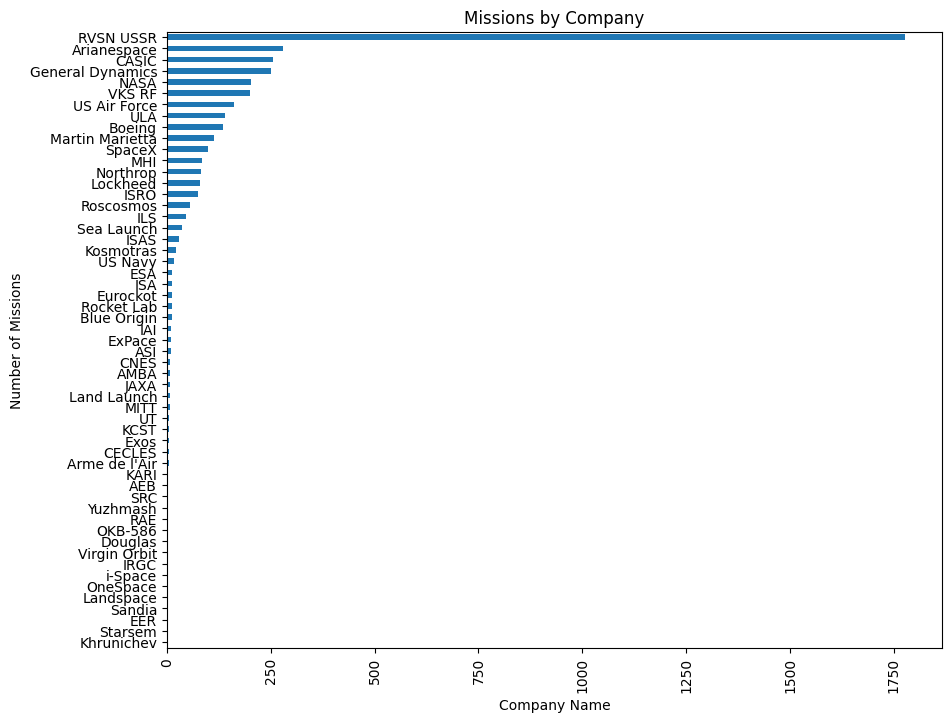

In [ ]:
missions_by_company = df_missions['Company Name'].value_counts(ascending=True)
plt.figure(figsize=(10, 8))
missions_by_company.plot(kind='barh')
plt.title('Missions by Company')
plt.xlabel('Company Name')
plt.ylabel('Number of Missions')
plt.xticks(rotation=90)
plt.show()

Interesting ! A clear first place of the RVSN USSR company.

Let's try normalizing by country.

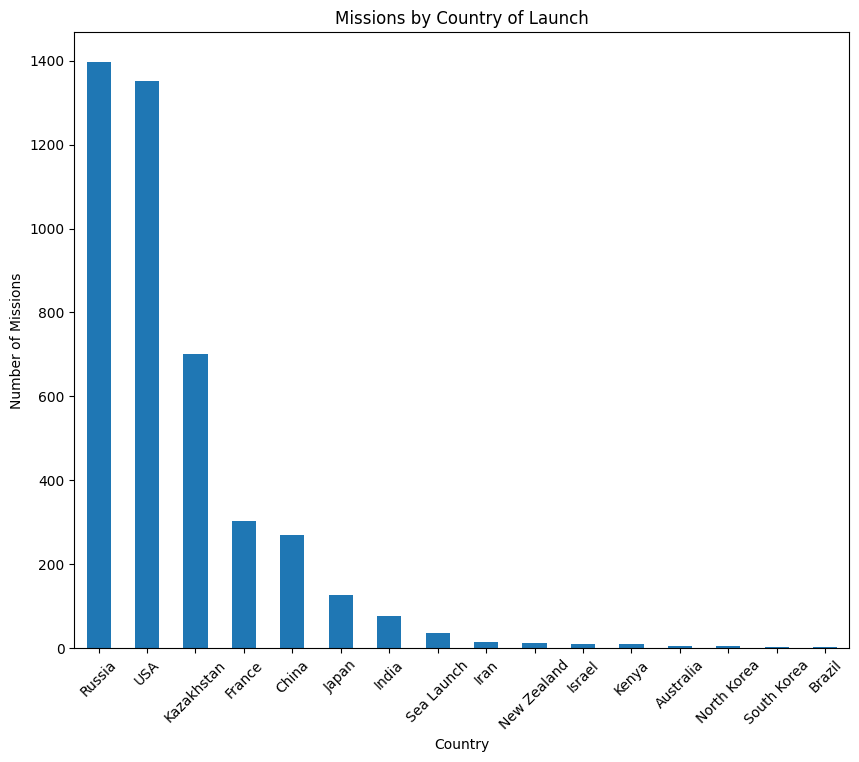

In [ ]:
missions_by_country = df_missions['Country of Launch'].value_counts()
plt.figure(figsize=(10, 8))
missions_by_country.plot(kind='bar')
plt.title('Missions by Country of Launch')
plt.xlabel('Country')
plt.ylabel('Number of Missions')
plt.xticks(rotation=45)
plt.show()

Ah, this makes more sense. We can see Russia and USA battling it out for the number 1 spot.


Let's now dive further and analyze the trend of the space missions over the years: 

**How have the number of launches and success rates changed?**

In [ ]:
## Number of Launches Over Time
launches_per_year = df_missions['Year'].value_counts().sort_index()

successes_per_year = df_missions[df_missions['Status Mission'] == 'Success'].groupby('Year').size()
total_launches_per_year = df_missions.groupby('Year').size()
success_rate_per_year = (successes_per_year / total_launches_per_year) * 100

## Launches Over Time

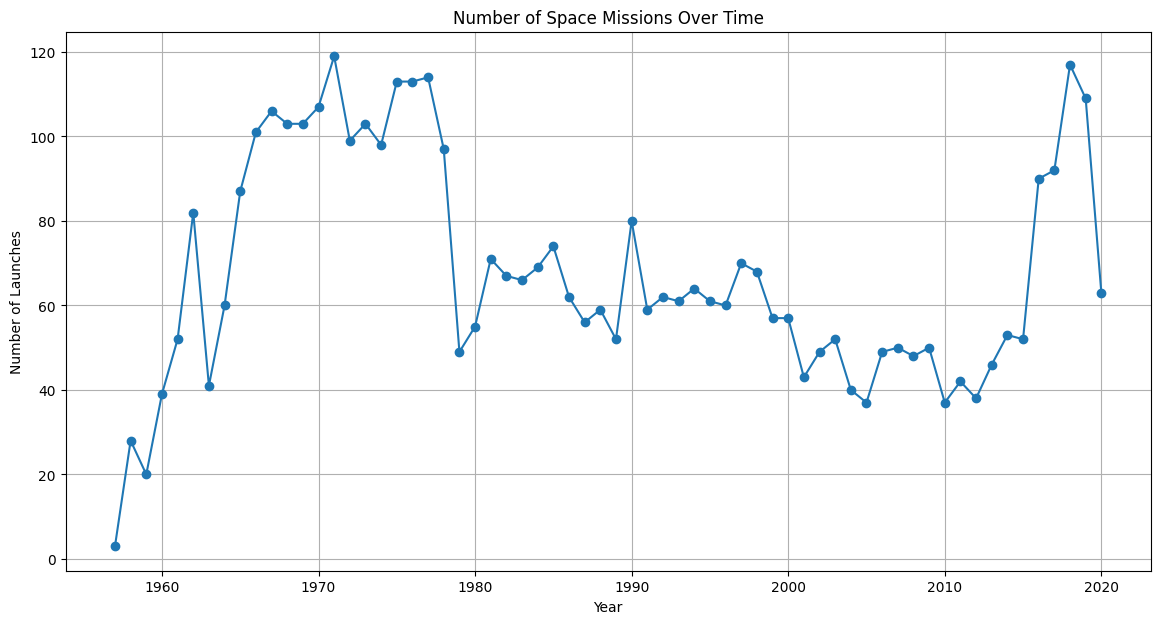

In [ ]:
plt.figure(figsize=(14, 7))
launches_per_year.plot(kind='line', marker='o')
plt.title('Number of Space Missions Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.grid(True)
plt.savefig('../images/Missions_Over_Time.png')
plt.show()


The data analysis has revealed intriguing patterns in the number of space missions over time. From the start of the Space Age in the 1950s until the end of the Cold War, we observe a significant surge in space missions. Our first assumption is that this period, marked by intense competition between the USA and the USSR, demonstrated how geopolitical rivalry  fueled rapid advancements in space technology which led to a race for space supremacy.

However, following the end of the Cold War, there has been a notable decrease in the frequency of launches.

This observation aligns with historical events: during the Cold War, space exploration was highly driven by the rivalry between the USA and the USSR, leading to the so-called "Space Race." After the dissolution of the Soviet Union in 1991 and the end of the Cold War, the immediate competitive pressure to launch missions decreased, which is reflected in the drop in the number of launches.

In addition, the most recent uptick may suggest a resurgence in space activity, possibly due to new players in the space industry and renewed interests in exploration and commercial opportunities beyond Earth.

Let's go in a bit more details and check the trends for the top 3 countries

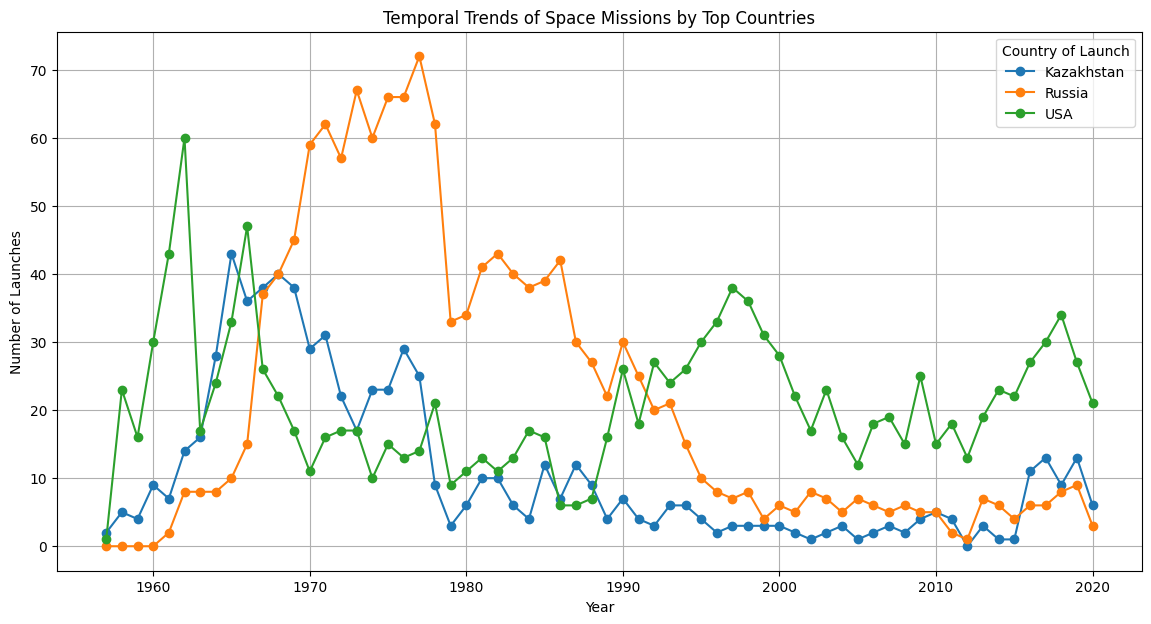

In [ ]:
df_missions['Year'] = pd.to_datetime(df_missions['DateTime']).dt.year

# Filter for top countries 
top_countries = df_missions['Country of Launch'].value_counts().head(3).index

launches_by_year_country = df_missions[df_missions['Country of Launch'].isin(top_countries)].groupby(['Year', 'Country of Launch']).size().unstack(fill_value=0)

# Plotting the temporal trends for top countries
launches_by_year_country.plot(kind='line', figsize=(14, 7), marker='o')
plt.title('Temporal Trends of Space Missions by Top Countries')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.grid(True)
plt.legend(title='Country of Launch')
plt.savefig('../images/Top_Countries_Missions_Over_Time.png')
plt.show()

## Success Rate Over Time

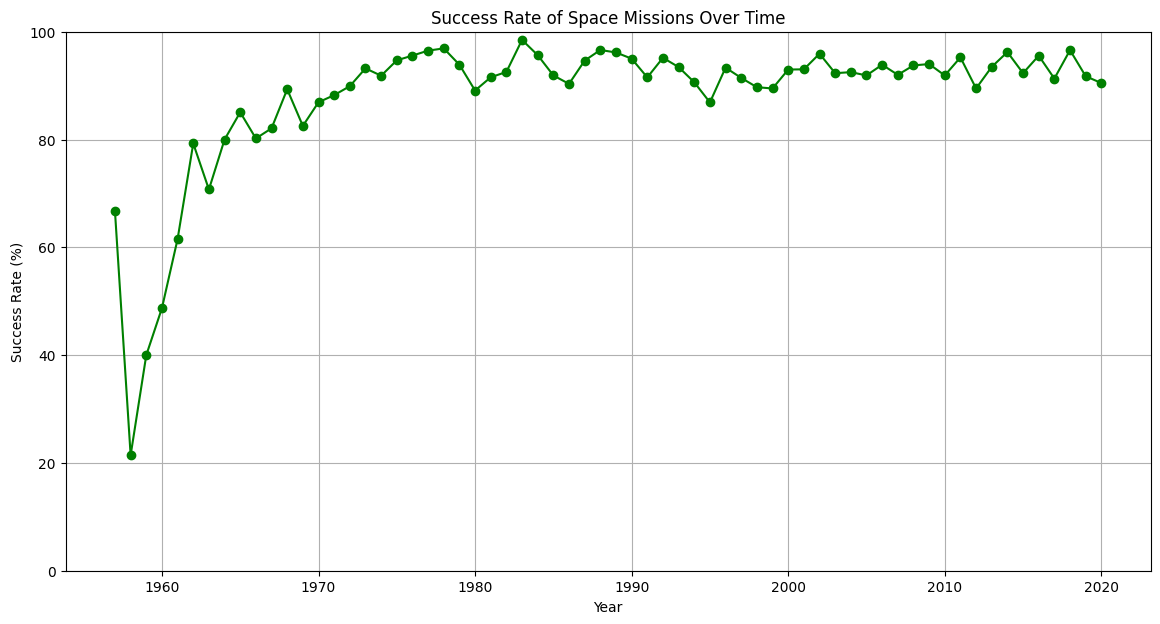

In [ ]:
plt.figure(figsize=(14, 7))
success_rate_per_year.plot(kind='line', color='green', marker='o')
plt.title('Success Rate of Space Missions Over Time')
plt.xlabel('Year')
plt.ylabel('Success Rate (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.savefig('../images/Success_Over_Time.png')
plt.show()


Moving to the success rate of space missions, we see a marked improvement over time, stabilizing at high levels post-1970, which reflects the maturation of space technology and improved mission protocols.

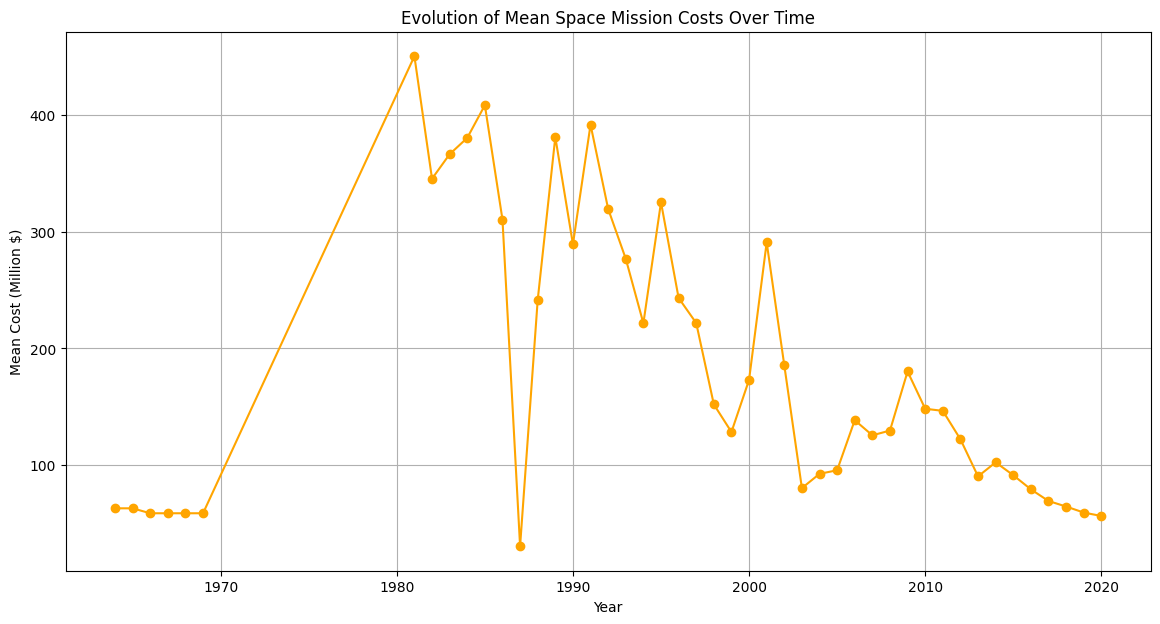

count    949.000000
mean     129.795237
std      143.220323
min        5.300000
25%       40.000000
50%       62.000000
75%      164.000000
max      450.000000
Name:  Rocket, dtype: float64


In [ ]:
# Dropping rows where cost data is not available for analysis
space_missions_costs = df_missions.dropna(subset=[' Rocket'])

cost_description = df_missions[' Rocket'].describe()


# Plot mean mission costs over time
mean_costs_per_year = space_missions_costs.groupby('Year')[' Rocket'].mean()

plt.figure(figsize=(14, 7))
mean_costs_per_year.plot(kind='line', marker='o', color='orange')
plt.title('Evolution of Mean Space Mission Costs Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Cost (Million $)')
plt.grid(True)
plt.savefig('../images/Mission_Cost_Over_Time.png')
plt.show()

print(cost_description)

The last 5 years of mean costs :

In [ ]:
print(mean_costs_per_year.tail())

Year
2016    79.457344
2017    69.491061
2018    64.749773
2019    59.609726
2020    56.650192
Name:  Rocket, dtype: float64


The descriptive statistics for mission costs indicate a mean cost of approximately 129.79 million $, with a standard deviation of 143.22 million, suggesting a wide range of mission costs.

Also, the plot of the mean mission costs over time displays a general trend of decreasing costs in recent years, especially noticeable from 2016 to 2020. This decline could reflect improvements in cost-efficiency, the impact of reusable launch technologies, and the entry of commercial players who may be driving down launch costs.

Let's move now to the other datasets about astronauts

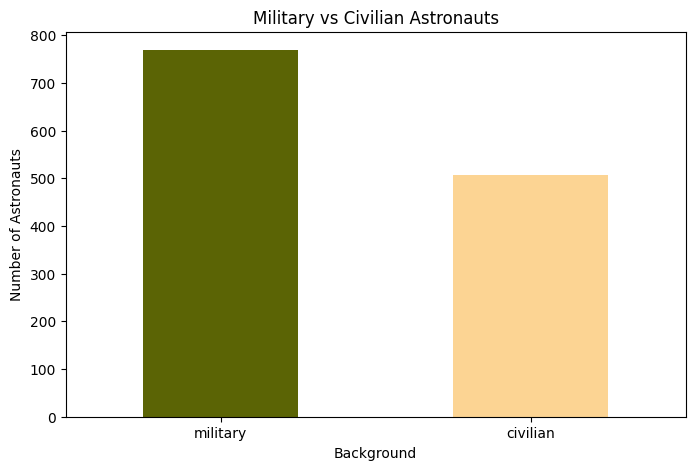

<Figure size 1500x700 with 0 Axes>

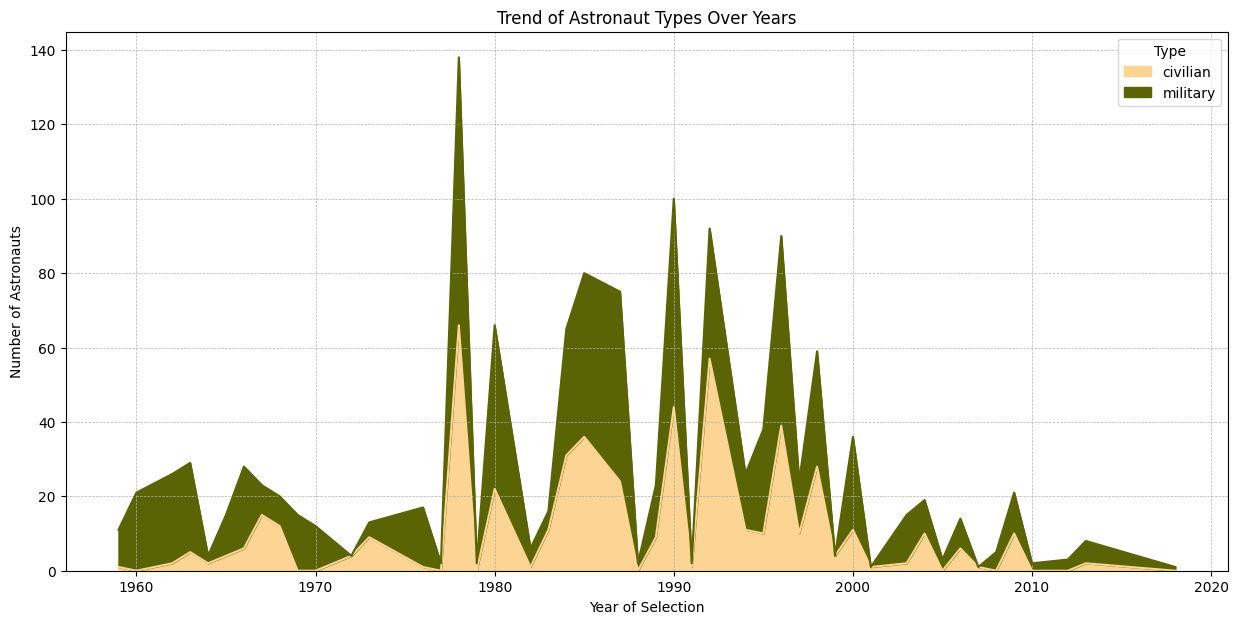

In [ ]:
military_vs_civilian_counts = df_astronauts['military_civilian'].value_counts()

# Plot military vs civilian astronauts
plt.figure(figsize=(8, 5))
military_vs_civilian_counts.plot(kind='bar', color=['#5b6405', '#FCD493'])
plt.title('Military vs Civilian Astronauts')
plt.xlabel('Background')
plt.ylabel('Number of Astronauts')
plt.xticks(rotation=0)
plt.show()

# Analyze the year of selection trends
astronauts_selection_trend = df_astronauts.groupby(['year_of_selection', 'military_civilian']).size().unstack(fill_value=0)

# Now, let's plot this trend over the years
plt.figure(figsize=(15, 7))
astronauts_selection_trend.plot(kind='area', stacked=True, figsize=(15, 7),
                                color=['#FCD493', '#5b6405'])  # Darker green shades
plt.title('Trend of Astronaut Types Over Years')
plt.xlabel('Year of Selection')
plt.ylabel('Number of Astronauts')
plt.legend(title='Type')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('../images/Trend_of_Astronaut_Types.png')
plt.show()


The higher proportion of astronauts with a military background may correlate with the early years of space exploration, which were heavily influenced by military and geopolitical motivations, especially during the Cold War era. We know that this period saw a significant number of space missions as part of the space race, often requiring military training and discipline.

The fluctuations in astronaut selections over the years may reflect the changing pace and priorities of space exploration efforts. For instance, peaks in astronaut selections could align with periods of increased space activity or the startt of new programs requiring fresh batches of astronauts.
The decrease in the number of launches observed after the end of the Cold War, followed by recent increases possibly due to commercial space activities, might also influence astronaut selection trends. Fewer launches could mean less frequent astronaut selections during periods of reduced space activity, while new commercial ventures and mission objectives might drive a need for more astronauts with diverse skills and backgrounds.

## Space Milestones

To extend our understanding of the trends in space exploration, we have added to our original dataset of space missions a comprehensive list of major milestones in space exploration. By integrating data sourced from [Encyclopedia Britannica's list of major space exploration milestones](https://www.britannica.com/science/space-exploration/Major-milestones)
, we want to draw connections between the number of missions and key historical events. This enriched dataset offers a chronological narrative that showcases the evolution of space exploration, marking the periods of heightened activity and technological breakthroughs.

In [ ]:
df_space_milestones.head()

,date accomplished,event,details,country or agency,Year
0,"Oct. 4, 1957",first artificial Earth satellite,Sputnik 1,Russia,1957
1,"Nov. 3, 1957",first animal launched into space,dog Laika aboard Sputnik 2,Russia,1957
2,"Sept. 14, 1959",first spacecraft to hard-land on another celes...,Luna 2,Russia,1959
3,"Oct. 7, 1959",first pictures of the far side of the Moon,Luna 3,Russia,1959
4,"April 1, 1960",first applications satellite launched,TIROS 1 (weather observation),USA,1960


Let's first check the number of milestones achieved by each Country

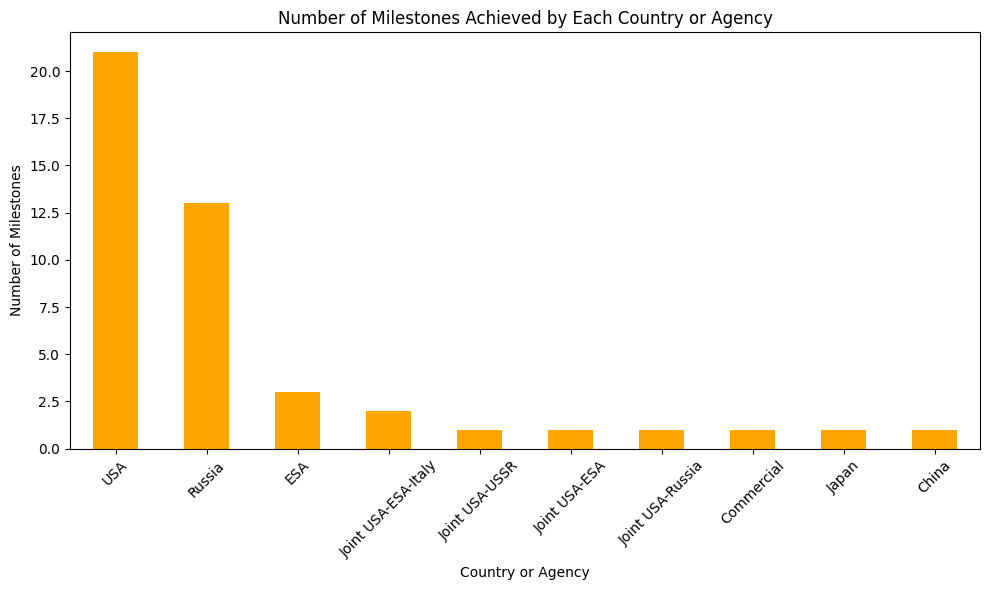

In [ ]:
# Count the number of milestones for each country
milestone_counts = df_space_milestones['country or agency'].value_counts()

plt.figure(figsize=(10, 6))
milestone_counts.plot(kind='bar', color='orange')
plt.xlabel('Country or Agency')
plt.ylabel('Number of Milestones')
plt.title('Number of Milestones Achieved by Each Country or Agency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../images/Milestones_Per_Country.png')
plt.show()

Finally let's see the importance of each milestone by analyzing the number of space missions during a range of 1 year from the specified milestone

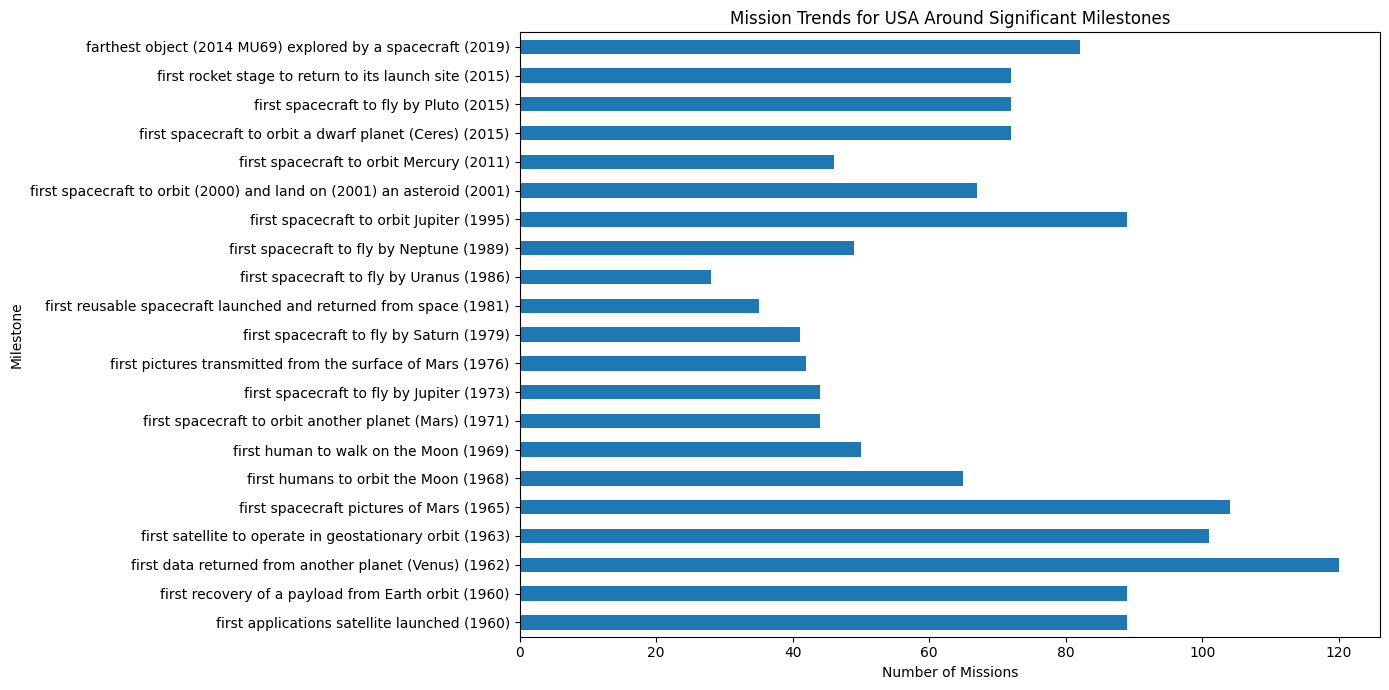

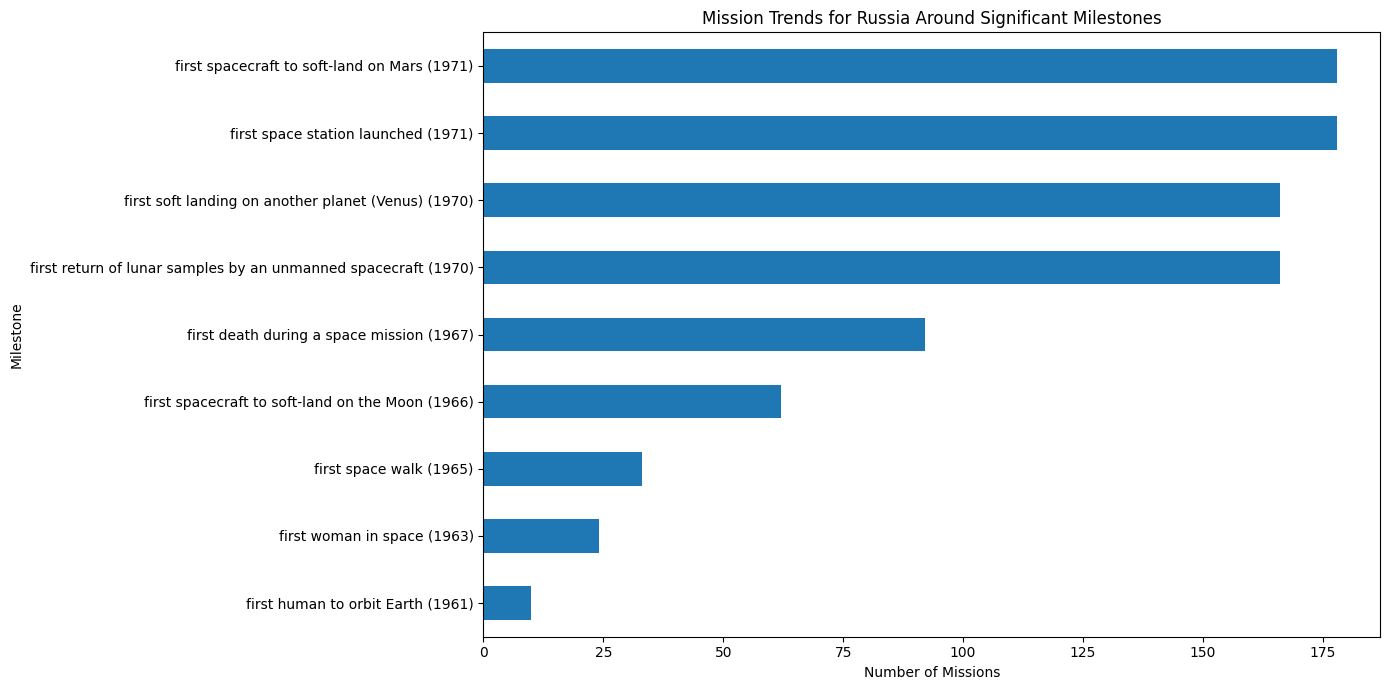

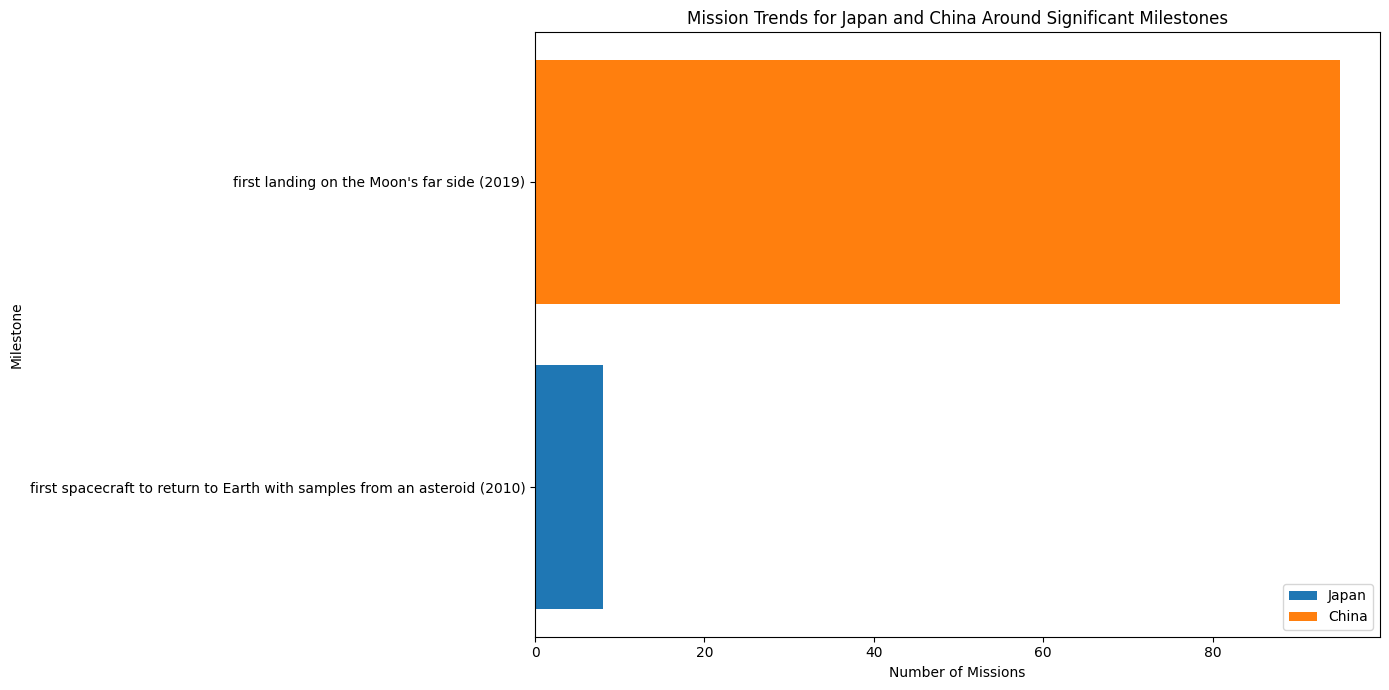

In [ ]:
trend_data = []

for index, milestone in df_space_milestones.iterrows():
    milestone_year = milestone.Year
    country_or_agency = milestone['country or agency']
    
    missions_in_range = df_missions[
        (df_missions['Country of Launch'] == country_or_agency) &
        (df_missions['Year'] <= milestone_year + 1) &
        (df_missions['Year'] >= milestone_year - 1)
    ].shape[0]
    

    if(missions_in_range > 0) :
        trend_data.append({
            'Country or Agency': country_or_agency,
            'Milestone': milestone['event'],
            'Missions In 1 year range': missions_in_range,
            'Year': milestone_year
        })

df_trend_analysis = pd.DataFrame(trend_data)


separate_countries = ['USA', 'Russia']
combined_countries = ['Japan', 'China']

#USA and Russia
for country_or_agency in separate_countries:
    country_data = df_trend_analysis[df_trend_analysis['Country or Agency'] == country_or_agency]
    country_data = country_data.set_index('Milestone')
    plt.figure(figsize=(14, 7))
    country_data['Missions In 1 year range'].plot(kind='barh')
    plt.title(f'Mission Trends for {country_or_agency} Around Significant Milestones')
    plt.xlabel('Number of Missions')
    plt.ylabel('Milestone')
    milestone_labels = [f"{milestone} ({year})" for milestone, year in zip(country_data.index, country_data['Year'])]
    plt.yticks(range(len(milestone_labels)), milestone_labels)
    plt.tight_layout()
    plt.savefig(f"../images/Missions_Around_Milestones({country_or_agency}).png")
    plt.show()

#Japan and China
fig, ax = plt.subplots(figsize=(14, 7))
for country_or_agency in combined_countries:
    country_data = df_trend_analysis[df_trend_analysis['Country or Agency'] == country_or_agency]
    country_data = country_data.set_index('Milestone')
    ax.barh(country_data.index + ' ' + '(' + country_data['Year'].astype(str) + ')', 
            country_data['Missions In 1 year range'], label=country_or_agency)


ax.set_title('Mission Trends for Japan and China Around Significant Milestones')
ax.set_xlabel('Number of Missions')
ax.set_ylabel('Milestone')
ax.legend()
plt.tight_layout()
plt.savefig('../images/Missions_Around_Milestones(Japan_China).png')
plt.show()


Some observations :

* Overall we can see significant spikes in the number of missions around major milestones, especially when breaking new ground such as orbiting and landing on new celestial bodies (the Moon, Mars, Neptune, Venus, Jupiter...).
* We also see newer space nations like China and Japan which are showing increased activity in recent years, indicating their growing capabilities and interest in space exploration.
* The nature of milestones is evolving, with earlier milestones focused on "firsts" discoveries in human and robotic space travel, while more recent ones may reflect technological advancements and deeper space exploration missions

